<a href="https://colab.research.google.com/github/stonefix/misc/blob/main/telemetry_research_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Здесь импорты

In [ ]:
%matplotlib inline
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches
import statsmodels.api as sm

import pickle

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Настройки

In [ ]:
# https://seaborn.pydata.org/tutorial/color_palettes.html
PALETTE_NAME = "Set2"
PALETTE = sns.color_palette(PALETTE_NAME, as_cmap=True);
CMAP = PALETTE
RANDOM_STATE = 42

In [ ]:
sns.color_palette(PALETTE_NAME)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [ ]:
cd drive/MyDrive/ТМИ/

/content/drive/MyDrive/ТМИ


## Предварительная работа с данными

In [ ]:
features = ['TR1,C', 'TR2,C', 'TR3,C', 'TR4,C', 'TR5,C', 'TR6,C', 'TR7,C', 'TR8,C', 'TR9,C', 'TR10,C', 'TR11,C', 'TR12,C', 'TR13,C', 'TR14,C', 'TR15,C', 'TR16,C']

In [ ]:
df_2018 = pd.read_excel('RS-41at 01.01.2018 0-00-00 - 01.04.2018 23-59-00.xlsx')

In [ ]:
df_2018 = df_2018.rename(columns={ df_2018.columns[0]: "date" })
df_2018['date_timestamp'] = df_2018.date.values.astype(np.float64);
df_2018_tr1_tr2 = df_2018[features].interpolate()
df_2018_tr1_tr2['date_timestamp'] = df_2018.date.values.astype(np.float64);
df_2018_tr1_tr2['tmupr'] = df_2018[['TmUpr,b']].fillna(0)


In [ ]:
df_clear_etalon = pd.read_excel('RS-41_clear.xlsx')

In [ ]:
df_clear_etalon_tmupr = df_clear_etalon[['TmUpr,b']].fillna(0) # будем считать, что NaN - это 0 значения и норма
df_clear_tr1_tr2 = df_clear_etalon[features].fillna(0)
df_clear_etalon = df_clear_etalon.rename(columns={ df_clear_etalon.columns[0]: "date" })
df_clear_tr1_tr2['date_timestamp'] = df_clear_etalon.date.values.astype(np.float64);
df_clear_tr1_tr2['tmupr'] = df_clear_etalon[['TmUpr,b']].fillna(0)

In [ ]:
df_2016 = pd.read_excel('RS-41at 01.01.2016 - 01.03.2016.xlsx');

## Графики

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


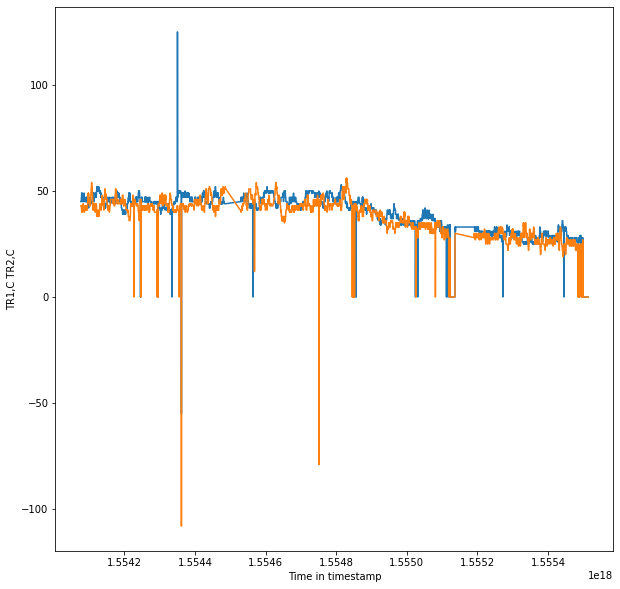

In [ ]:
# можем проанализировать изобразить данные на больших промежутках времени. 
# и увидеть отклонения от нормы 
# Это данные для эталона
plt.figure(figsize=(10, 10))
sns.lineplot(df_clear_tr1_tr2['date_timestamp'], df_clear_tr1_tr2['TR1,C'])
sns.lineplot(df_clear_tr1_tr2['date_timestamp'], df_clear_tr1_tr2['TR2,C'])
plt.xlabel('Time in timestamp');
plt.ylabel('TR1,C TR2,C');
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


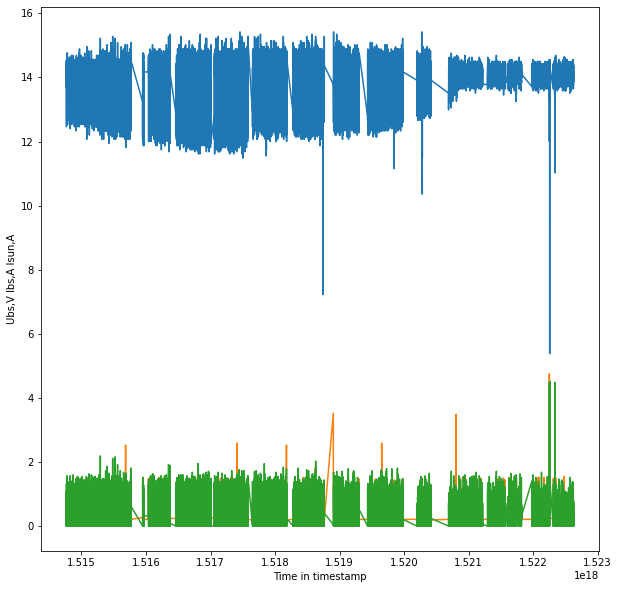

In [ ]:
# можем проанализировать изобразить данные на больших промежутках времени. 
# и увидеть отклонения от нормы 
# Ubs,V	Ibs,A	Isun,A
plt.figure(figsize=(10, 10))
sns.lineplot(df_2018['date_timestamp'], df_2018['Ubs,V'])
sns.lineplot(df_2018['date_timestamp'], df_2018['Ibs,A'])
sns.lineplot(df_2018['date_timestamp'], df_2018['Isun,A'])
plt.xlabel('Time in timestamp');
plt.ylabel('Ubs,V Ibs,A Isun,A');
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


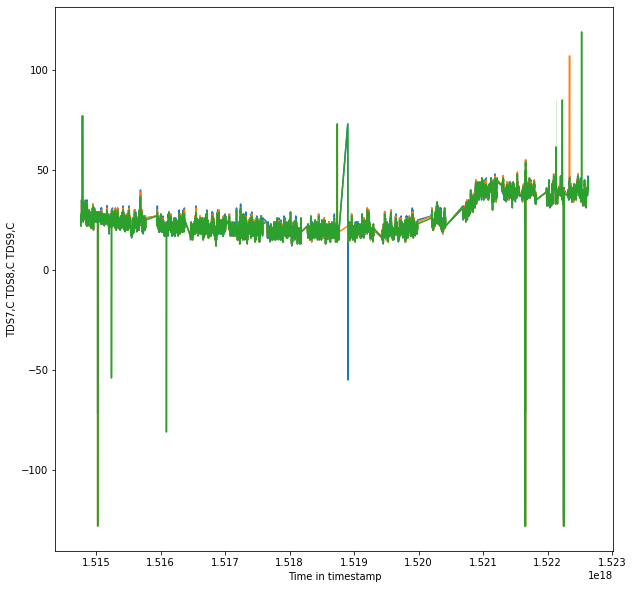

In [ ]:
plt.figure(figsize=(10, 10))
sns.lineplot(df_2018['date_timestamp'], df_2018['TDS7,C'])
sns.lineplot(df_2018['date_timestamp'], df_2018['TDS8,C'])
sns.lineplot(df_2018['date_timestamp'], df_2018['TDS9,C'])
plt.xlabel('Time in timestamp');
plt.ylabel('TDS7,C TDS8,C TDS9,C');
plt.show()

## Выделение train данных


In [ ]:
features = ['Ubs,V', 'Ibs,A', 'Isun,A']

In [ ]:
#frames = [df_clear_tr1_tr2, df_2018_tr1_tr2]
frames = df_2018
#df_final = pd.concat(frames)
df_final = df_2018
final_x_train = df_final[features].interpolate()
final_y_train =  df_final['TmUpr,b'].fillna(0)

In [ ]:
# Т.к. tmupr - Это битовые данные, мы их преобразуем и разметим нумерацией по возрастанию
final_bit = final_y_train.apply(lambda x: str(int(x)))
final_bit = final_bit.apply(lambda x: int(x, 2))

In [ ]:
labels = final_bit.unique().tolist()

In [ ]:
labels = sorted(labels)
print(labels)

[0, 8, 10, 14, 28, 29, 135, 254]


In [ ]:
final_bit.unique()

array([ 14,   0, 135,   8,  28,  10, 254,  29])

In [ ]:
final_bit.loc[final_bit == 6] = 1
final_bit.loc[final_bit == 8] = 2
final_bit.loc[final_bit == 10] = 3
final_bit.loc[final_bit == 14] = 4
final_bit.loc[final_bit == 28] = 5
final_bit.loc[final_bit == 29] = 6
final_bit.loc[final_bit == 135] = 7
final_bit.loc[final_bit == 254] = 8 

## Выделение test данных

In [ ]:
# тестовые данные
df_test = df_2016[df_2016['TmUpr,b'] == 0] # тестовые данные возьмем из 2016го года на 0
X_test = df_test[features].interpolate()
y_test = df_test['TmUpr,b'].fillna(0) 

In [ ]:
final_bit_test = y_test.apply(lambda x: str(int(x)))
final_bit_test = final_bit_test.apply(lambda x: int(x, 2))

In [ ]:
final_test_tsne = (X_test + final_x_train).interpolate()

## TSNE

In [ ]:
def plot_2d(x, y, title, xlabel="1st vector", ylabel="2nd vector", target_data = final_y_train):
    sns.set_style("darkgrid")
    plt.rcParams["figure.figsize"] = (15,15)
    plt.scatter(x, y, c=target_data, cmap=CMAP, s=40)  
    plt.title(title, fontsize=20, y=1.03)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    color_array = list(CMAP.colors)
    h = []
    for c in range(0, 8):
        h.append(mpatches.Patch(color=color_array[c], label=labels[c])) 
    plt.legend(handles=h)
    plt.show()

In [ ]:
tsne = TSNE(n_components=2, n_iter=1000, random_state=RANDOM_STATE) 
points_train = tsne.fit_transform(final_x_train)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
points_test = tsne.fit_transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
points_train_test = tsne.fit_transform(final_test_tsne)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


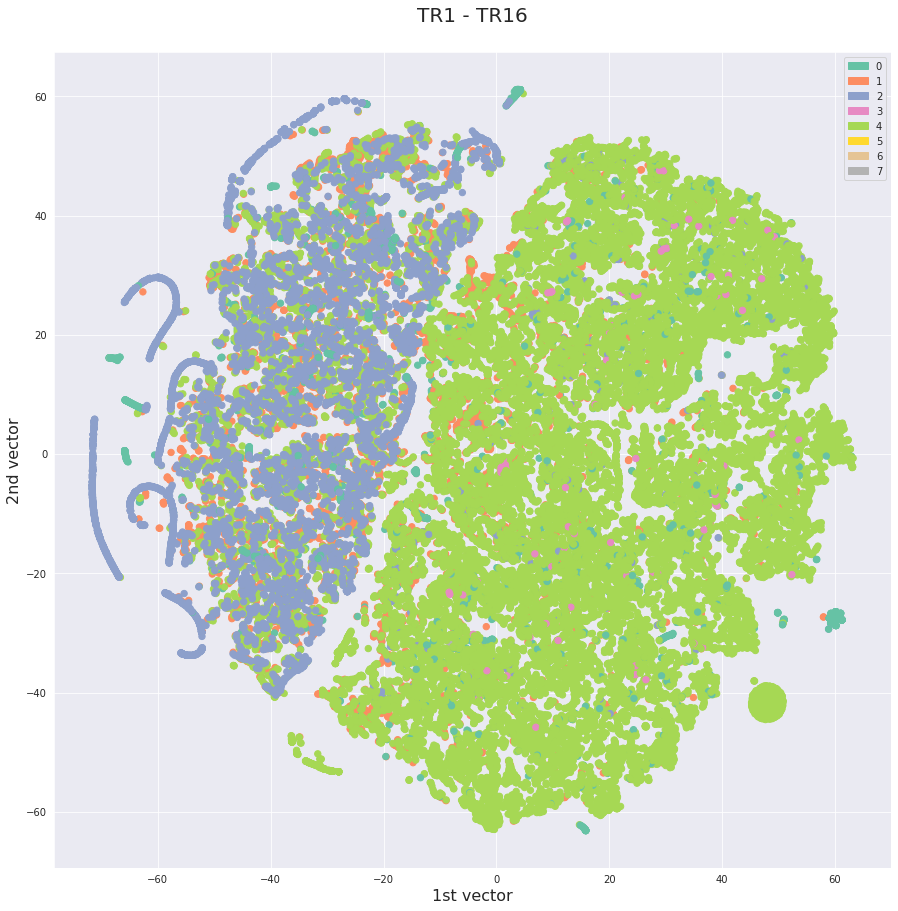

In [ ]:
plot_2d(x = points_train[:, 0], y = points_train[:, 1], title = 'Ubs, Ibs, Isun', target_data = final_bit)

## Версия моделей с пониженной размерностью


In [ ]:
svmod_default=SVC()
svmod_default.fit(points_train,final_bit)

SVC()

In [ ]:
points_train.size

91782

In [ ]:
points_test.size

121474

Text(114.0, 0.5, 'Prediction')

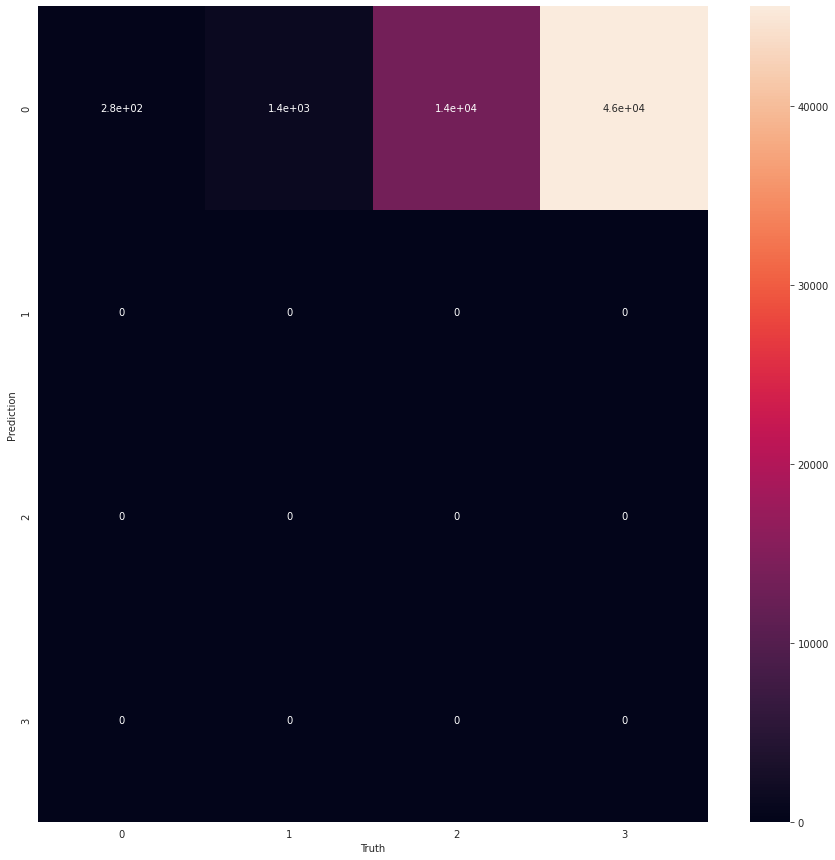

In [ ]:
ypred_svmod_default=svmod_default.predict(points_test)
cm_svm=confusion_matrix(final_bit_test,ypred_svmod_default)
sns.heatmap(cm_svm,annot=True)
plt.xlabel('Truth')
plt.ylabel('Prediction')

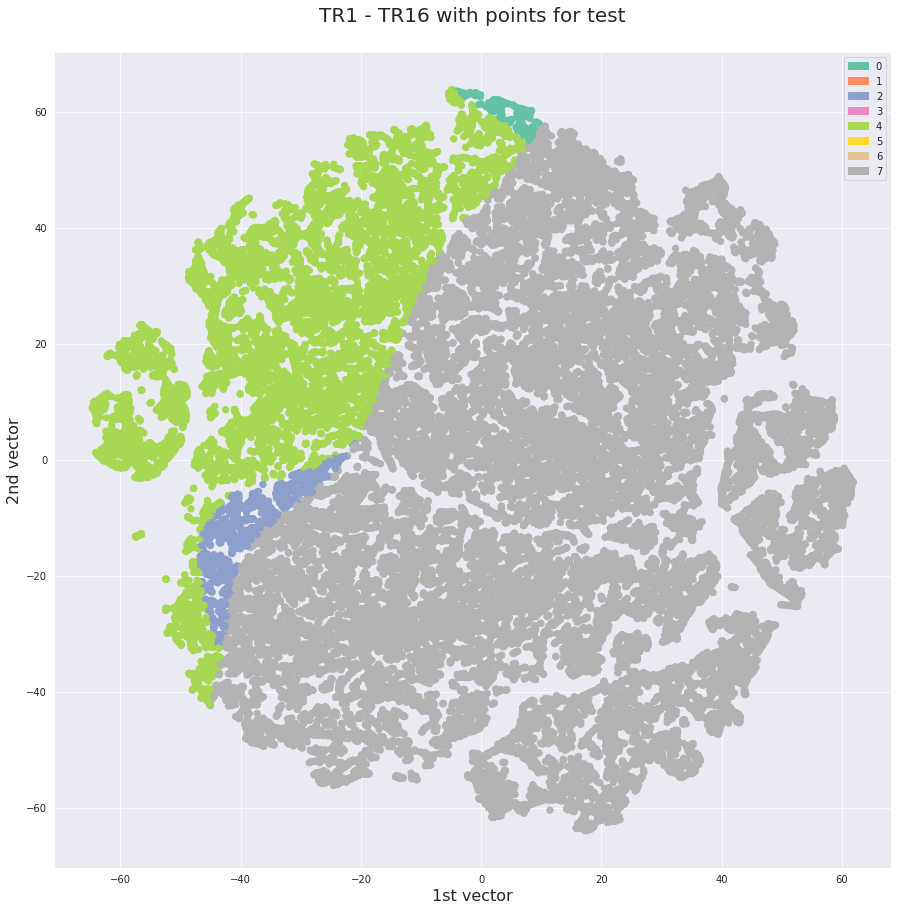

In [ ]:
plot_2d(x = points_test[:, 0], y = points_test[:, 1], title = 'TR1 - TR16 with points for test', target_data = ypred_svmod_default)

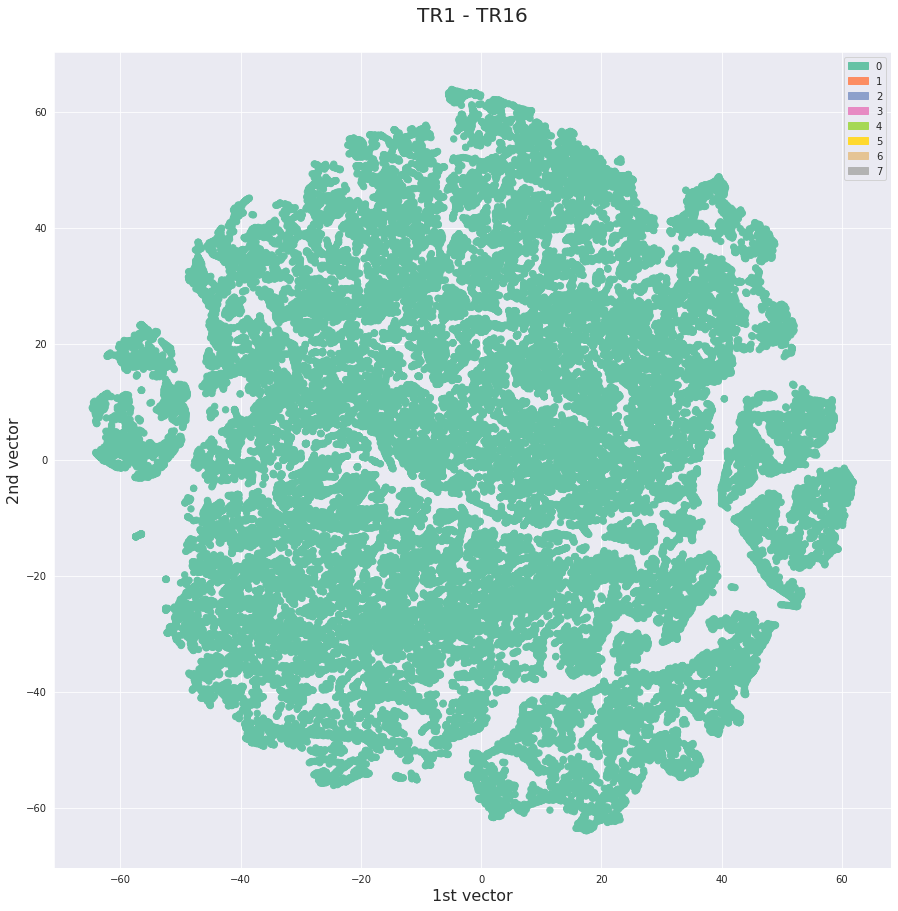

In [ ]:
plot_2d(x = points_test[:, 0], y = points_test[:, 1], title = 'TR1 - TR16', target_data = final_bit_test)

## Различные модели

In [ ]:
svmod_default=SVC()
svmod_default.fit(final_x_train,final_bit)

SVC()

Text(114.0, 0.5, 'Prediction')

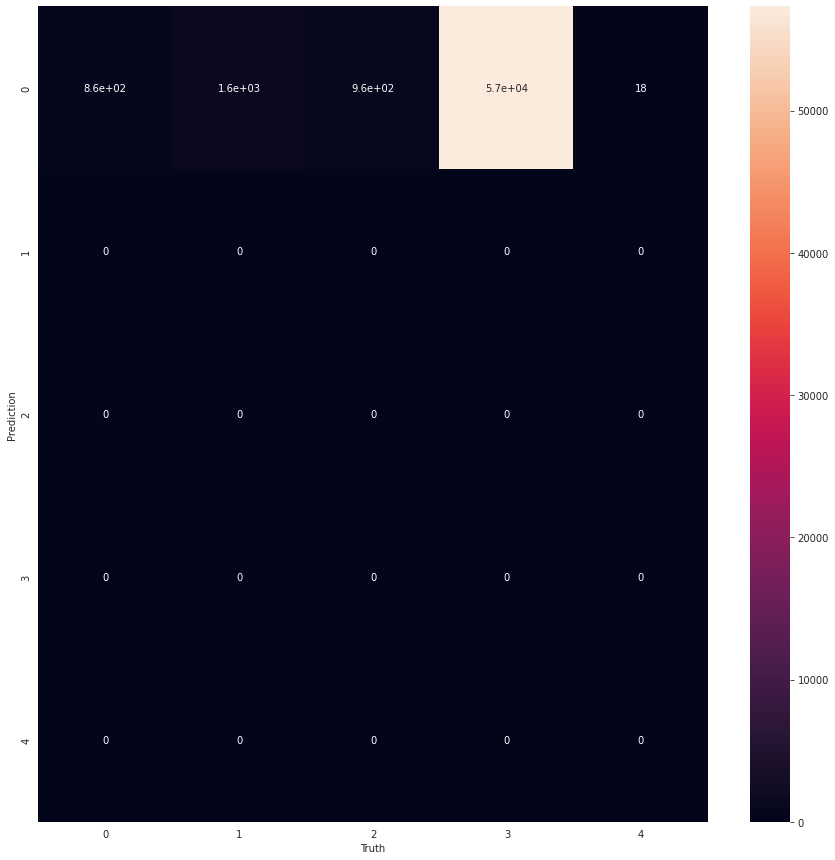

In [ ]:
ypred_svmod_default=svmod_default.predict(X_test)
cm_svm=confusion_matrix(final_bit_test,ypred_svmod_default)
sns.heatmap(cm_svm,annot=True)
plt.xlabel('Truth')
plt.ylabel('Prediction')

In [ ]:
svmod=LinearSVC()
svmod.fit(final_x_train,final_bit)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

Text(114.0, 0.5, 'Prediction')

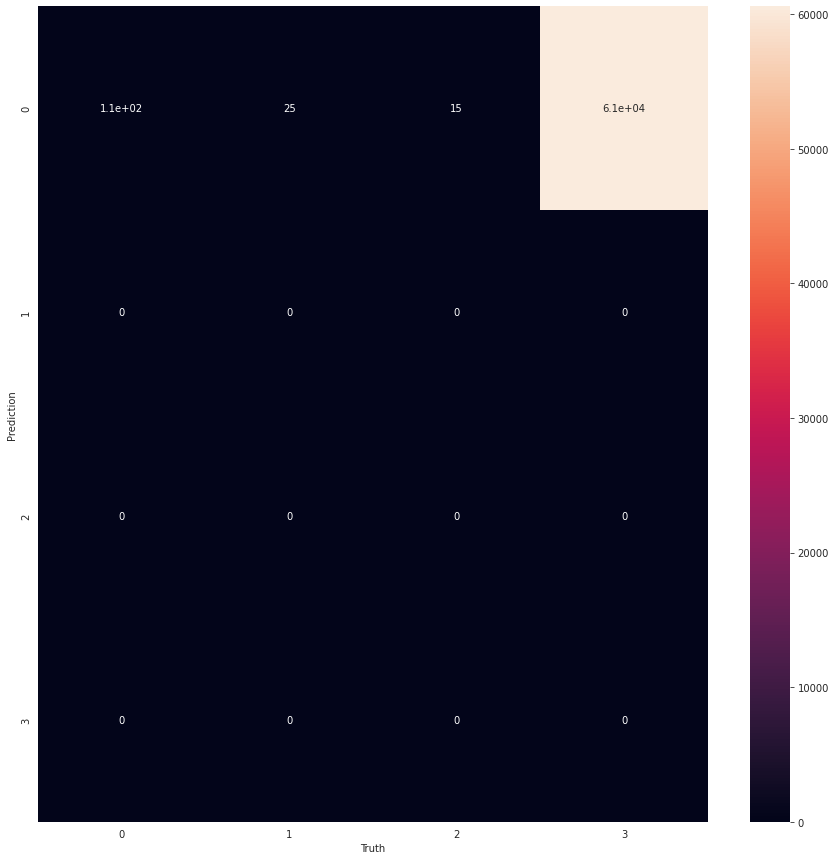

In [ ]:
ypred_svmod=svmod.predict(X_test)
cm_svm=confusion_matrix(final_bit_test,ypred_svmod)
sns.heatmap(cm_svm,annot=True)
plt.xlabel('Truth')
plt.ylabel('Prediction')

## Различные выводы

In [ ]:
model = sm.OLS(final_y_train, final_x_train)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  tmupr   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              5.770
Date:                Wed, 29 Dec 2021   Prob (F-statistic):                     0.00312
Time:                        11:32:36   Log-Likelihood:                     -6.0133e+05
No. Observations:               45891   AIC:                                  1.203e+06
Df Residuals:                   45889   BIC:                                  1.203e+06
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
print(classification_report(final_bit_test, ypred_svmod, sample_weight=None, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.0018    0.0035     60737
           1     0.0000    0.0000    0.0000         0
           2     0.0000    0.0000    0.0000         0
           4     0.0000    0.0000    0.0000         0

    accuracy                         0.0018     60737
   macro avg     0.2500    0.0004    0.0009     60737
weighted avg     1.0000    0.0018    0.0035     60737



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
final_bit_test.unique()

array([0])

In [ ]:
print(classification_report(final_bit_test, ypred_svmod_default, sample_weight=None, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.0141    0.0279     60737
           1     0.0000    0.0000    0.0000         0
           2     0.0000    0.0000    0.0000         0
           4     0.0000    0.0000    0.0000         0
           7     0.0000    0.0000    0.0000         0

    accuracy                         0.0141     60737
   macro avg     0.2000    0.0028    0.0056     60737
weighted avg     1.0000    0.0141    0.0279     60737



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
f1_score(y_test, ypred_svmod)

ValueError: ignored